## Шаг 1: выбор темы



https://www.kaggle.com/datasets/prishasawhney/imdb-dataset-top-2000-movies?resource=download

##### IMDB Dataset (Top 2000 movies)


In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 2: сбор данных (максимум 20)



In [2]:
file_path = '/Users/trifonovaekaterina/Downloads/imdb_top_2000_movies.csv'

df = pd.read_csv(file_path)

In [3]:
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,$11.00M
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,$60.02M
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,$33.31M
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,$15.28M


# Шаг 3: Предварительныя обработка (максимум 10 баллов)



In [4]:
# Преобразование столбца Gross в числовой формат, предварительно обработав значения

df["Gross"] = df["Gross"].str.replace("[\$,M]", "", regex=True).astype(float)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28


In [5]:
# Находим медианное значение кассовых сборов

gross_median = df["Gross"].median()

In [6]:
# Заполняем пропуски в столбце Gross медианным значением

df["Gross"].fillna(gross_median, inplace=True)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28


In [7]:
# Преобразуем столбец Votes в числовой формат, удаляя запятые и преобразуя строки в целые числа

df["Votes"] = df["Votes"].str.replace(",", "").astype(int)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00
1996,Tooth Fairy,I 2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28


In [8]:
# Заполнение пропусков для IMDB Rating средним значением

df["IMDB Rating"].fillna(df["IMDB Rating"].mean(), inplace=True)

# Заполнение пропусков для Metascore медианным значением
df["Metascore"].fillna(df["Metascore"].median(), inplace=True)
# Заполнение пропусков в Director и Cast
df["Director"].fillna("Unknown", inplace=True)
df["Cast"].fillna("Unknown", inplace=True)

In [9]:
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00
1996,Tooth Fairy,I 2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28


In [10]:
df.isnull().sum()

Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64

In [11]:

df.dtypes

Movie Name       object
Release Year     object
Duration          int64
IMDB Rating     float64
Metascore       float64
Votes             int64
Genre            object
Director         object
Cast             object
Gross           float64
dtype: object

In [12]:
#можем заметить что  Release Year - object, поэтому преобразуем

df["Release Year"] = df["Release Year"].str.extract('(\d+)')[0].astype("Int64")
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00
1996,Tooth Fairy,2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28


In [13]:
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00
1996,Tooth Fairy,2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28


# Шаг 4. Визуализация (максимум 20 баллов)



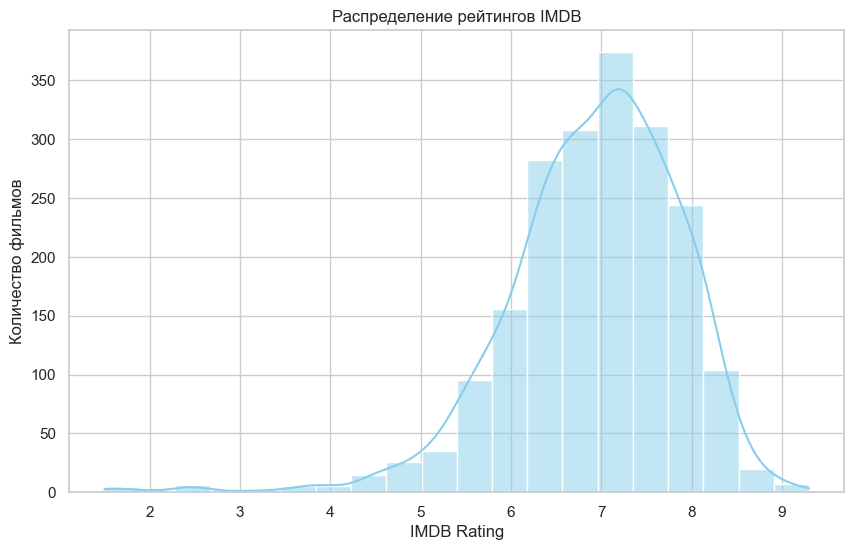

In [14]:
sns.set(style="whitegrid")

# 1. Распределение рейтингов IMDB
plt.figure(figsize=(10, 6))
sns.histplot(df["IMDB Rating"], kde=True, bins=20, color="skyblue")
plt.title("Распределение рейтингов IMDB")
plt.xlabel("IMDB Rating")
plt.ylabel("Количество фильмов")
plt.show()


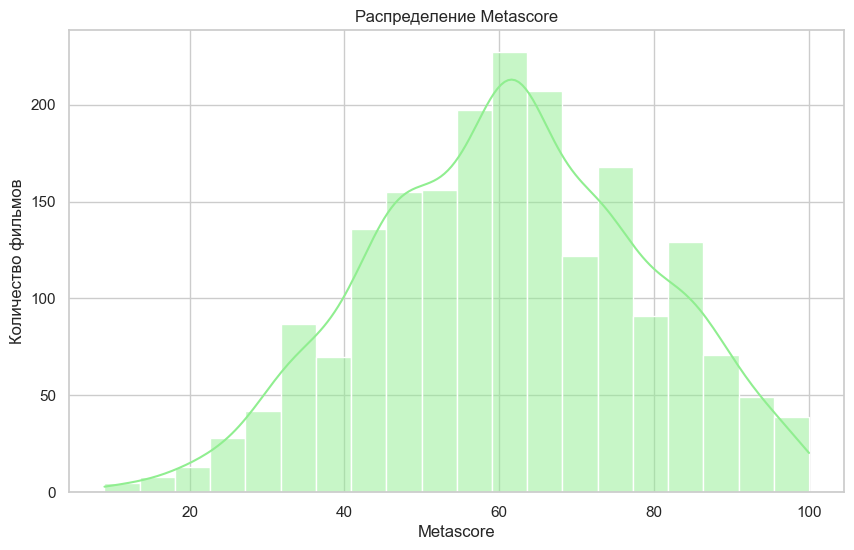

In [15]:
# 2. Распределение Metascore
plt.figure(figsize=(10, 6))
sns.histplot(df["Metascore"], kde=True, bins=20, color="lightgreen")
plt.title("Распределение Metascore")
plt.xlabel("Metascore")
plt.ylabel("Количество фильмов")
plt.show()

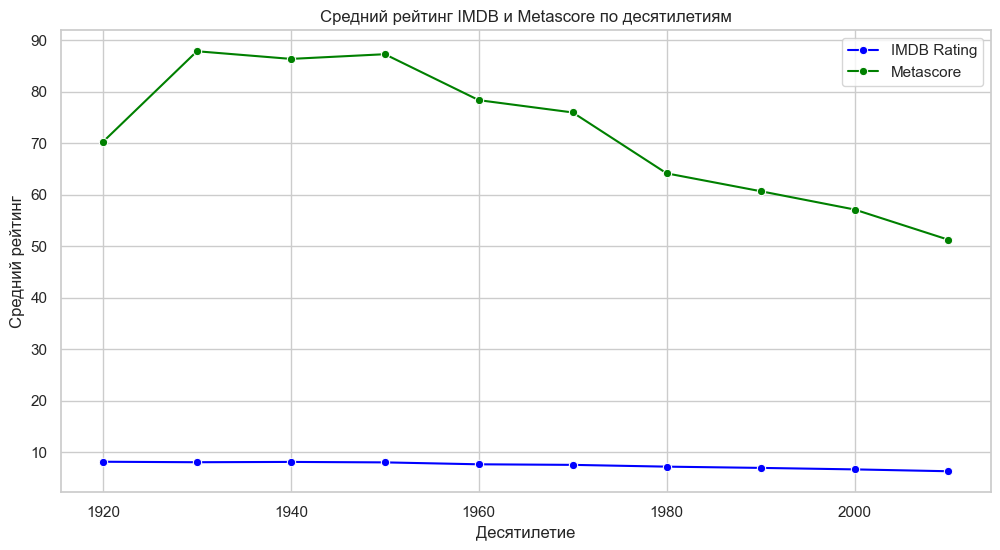

In [16]:
# 3. Сравнение средних рейтингов IMDB и Metascore по десятилетиям
df["Decade"] = (df["Release Year"] // 10 * 10).astype(int)
decade_rating = df.groupby("Decade").agg({"IMDB Rating": "mean", "Metascore": "mean"}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Decade", y="IMDB Rating", data=decade_rating, marker="o", label="IMDB Rating", color="blue")
sns.lineplot(x="Decade", y="Metascore", data=decade_rating, marker="o", label="Metascore", color="green")
plt.title("Средний рейтинг IMDB и Metascore по десятилетиям")
plt.xlabel("Десятилетие")
plt.ylabel("Средний рейтинг")
plt.legend()
plt.show()


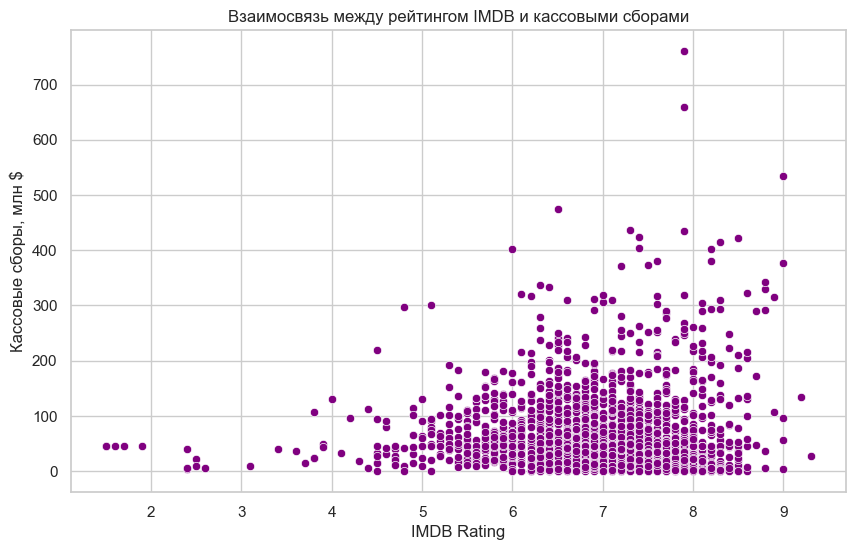

In [17]:
# 4. Взаимосвязь между рейтингом IMDB и кассовыми сборами
plt.figure(figsize=(10, 6))
sns.scatterplot(x="IMDB Rating", y="Gross", data=df, color="purple")
plt.title("Взаимосвязь между рейтингом IMDB и кассовыми сборами")
plt.xlabel("IMDB Rating")
plt.ylabel("Кассовые сборы, млн $")
plt.show()

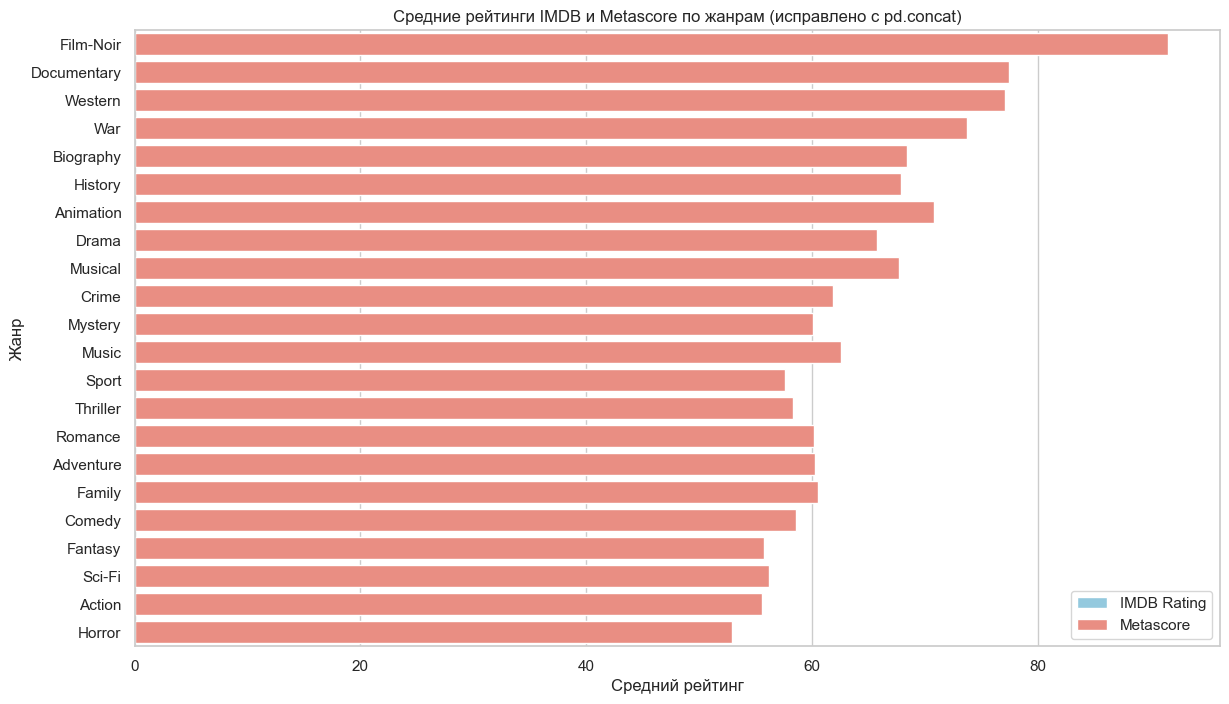

In [18]:
# Повторное определение unique_genres
unique_genres = set(", ".join(df["Genre"].dropna()).split(", "))

# Пересоздание DataFrame genre_ratings без использования append
genre_ratings_list = []

for genre in unique_genres:
    filtered_df = df[df["Genre"].str.contains(genre, na=False)]
    mean_imdb = filtered_df["IMDB Rating"].mean()
    mean_metascore = filtered_df["Metascore"].mean()
    genre_ratings_list.append({"Genre": genre, "IMDB Rating": mean_imdb, "Metascore": mean_metascore})

genre_ratings_fixed = pd.DataFrame(genre_ratings_list)

# Сортировка DataFrame по IMDB рейтингу для визуализации
genre_ratings_sorted_fixed = genre_ratings_fixed.sort_values(by="IMDB Rating", ascending=False)

# Визуализация средних рейтингов IMDB и Metascore по жанрам с использованием исправленного подхода
plt.figure(figsize=(14, 8))
sns.barplot(x="IMDB Rating", y="Genre", data=genre_ratings_sorted_fixed, color="skyblue", label="IMDB Rating")
sns.barplot(x="Metascore", y="Genre", data=genre_ratings_sorted_fixed, color="salmon", label="Metascore")
plt.title("Средние рейтинги IMDB и Metascore по жанрам (исправлено с pd.concat)")
plt.xlabel("Средний рейтинг")
plt.ylabel("Жанр")
plt.legend()
plt.show()


# Шаг 5. Создание новых признаков (максимум 10 баллов)

In [19]:

# Эпоха Выпуска (Release Era)
df["Release Era"] = pd.cut(df["Release Year"], bins=[0, 1980, 2000, np.inf], labels=["old", "classic", "modern"])

# Кассовый Успех (Box Office Success)
gross_median = df["Gross"].median()
df["Box Office Success"] = pd.cut(df["Gross"], bins=[0, gross_median, np.inf], labels=["low", "high"])

# Жанровое Разнообразие (Genre Diversity)
df["Genre Diversity"] = df["Genre"].apply(lambda x: len(x.split(", ")))

In [20]:
# Проверим новые переменные, добавленные в датасет
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Decade,Release Era,Box Office Success,Genre Diversity
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97,1970,old,high,2
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30,1970,old,high,2
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80,1980,old,high,1
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82,1960,old,low,3
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82,1970,old,low,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00,2000,modern,low,3
1996,Tooth Fairy,2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02,2010,modern,high,3
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31,2000,modern,low,3
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28,2000,modern,low,3


### Новые Переменные успешно добавлены в датасет:

Release Era: Классифицирует фильмы на "old" (до 1980 года), "classic" (1980-1999), и "modern" (после 2000 года).

Box Office Success: Определяет кассовый успех фильма как "low" или "high" на основе медианы кассовых сборов всех фильмов.

Genre Diversity: Показывает количество жанров, к которым относится каждый фильм, отражая его жанровое разнообразие.

In [21]:
# Определение новых переменных
df["Highly Rated"] = df["IMDB Rating"] > 8.0
df["Critical Success"] = df["Metascore"] > 80

# Определение Audience vs Critics
conditions = [
    (df["IMDB Rating"] > df["Metascore"]/10 + 0.5),
    (df["IMDB Rating"] < df["Metascore"]/10 - 0.5)
]
choices = ["audience_favored", "critics_favored"]
df["Audience vs Critics"] = np.select(conditions, choices, default="balanced")

# Определение Length Category
bins = [0, 90, 120, np.inf]
labels = ["short", "medium", "long"]
df["Length Category"] = pd.cut(df["Duration"], bins=bins, labels=labels)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Decade,Release Era,Box Office Success,Genre Diversity,Highly Rated,Critical Success,Audience vs Critics,Length Category
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97,1970,old,high,2,True,True,critics_favored,long
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30,1970,old,high,2,True,True,balanced,long
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80,1980,old,high,1,False,True,critics_favored,long
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82,1960,old,low,3,True,True,critics_favored,long
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82,1970,old,low,3,False,False,balanced,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11.00,2000,modern,low,3,False,False,audience_favored,medium
1996,Tooth Fairy,2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60.02,2010,modern,high,3,False,False,audience_favored,medium
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33.31,2000,modern,low,3,False,False,balanced,medium
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15.28,2000,modern,low,3,False,False,balanced,short


+ Highly Rated (Высоко оцененный): Бинарная переменная, указывающая, превышает ли рейтинг IMDB определенный порог, например, 8.0. Это позволит быстро идентифицировать фильмы, которые особенно высоко ценятся аудиторией.

+ Critical Success (Успех у критиков): Бинарная переменная, показывающая, превышает ли Metascore определенный порог, например, 80. Эта переменная поможет выделить фильмы, которые особенно высоко оценены критиками.

+ Audience vs Critics (Аудитория против критиков): Категориальная переменная, классифицирующая фильмы на основе соотношения между рейтингом IMDB и Metascore. Например, "audience_favored" для фильмов, где рейтинг IMDB значительно выше Metascore, "critics_favored" для обратного случая, и "balanced" для случаев, когда рейтинги схожи.

+ Length Category (Категория продолжительности): Категориальная переменная, классифицирующая фильмы по их продолжительности на "short" (<90 минут), "medium" (90-120 минут) и "long" (>120 минут). Это поможет проанализировать, есть ли зависимость между продолжительностью фильма и его популярностью или качеством.

## Шаг 6. Гипотезы (максимум 20 баллов)

При визуализации у вас возникли гипотезы о закономерностях, которые есть в ваших данных. Проверьте эти гипотезы с помощью математической статистики. Итоговый балл зависит от того, насколько интересные находки вы сделаете и насколько корректно вы подберёте для проверки критерий/процедуру. Это может быть что угодно от непараметрических тестов и z-статистики до бутстрапа и теста отношения правдоподобий.



#### Гипотеза 1: Высоко оцененные фильмы против остальных по кассовым сборам

Нулевая гипотеза (H0): Кассовые сборы высоко оцененных фильмов (рейтинг IMDB > 8) не отличаются от кассовых сборов остальных фильмов.

Альтернативная гипотеза (H1): Кассовые сборы высоко оцененных фильмов и остальных фильмов различаются.


#### Гипотеза 2: Корреляция между продолжительностью фильма и его рейтингом на IMDB

Нулевая гипотеза (H0): Нет статистически значимой корреляции между продолжительностью фильма и его рейтингом на IMDB.

Альтернативная гипотеза (H1): Существует статистически значимая корреляция между продолжительностью фильма и его рейтингом на IMDB.

In [22]:
from scipy.stats import mannwhitneyu, spearmanr


In [23]:
# Гипотеза 1: Высоко оцененные фильмы против остальных по кассовым сборам
# Разделение выборок
highly_rated_gross = df[df["Highly Rated"] == True]["Gross"].dropna()
other_gross = df[df["Highly Rated"] == False]["Gross"].dropna()

# Применение U-теста Манна-Уитни
mwu_stat, mwu_pval = mannwhitneyu(highly_rated_gross, other_gross)

# Вывод результатов для Гипотезы 1
print("Гипотеза 1: Различие в кассовых сборах между высоко оценёнными фильмами и остальными.")
print(f"U-статистика: {mwu_stat}, p-значение: {mwu_pval}")
if mwu_pval < 0.05:
    print("Отвергаем нулевую гипотезу: кассовые сборы значимо различаются.")
else:
    print("Не отвергаем нулевую гипотезу: значимых различий в кассовых сборах нет.")

Гипотеза 1: Различие в кассовых сборах между высоко оценёнными фильмами и остальными.
U-статистика: 162170.5, p-значение: 0.02137612588854139
Отвергаем нулевую гипотезу: кассовые сборы значимо различаются.


In [24]:
# Гипотеза 2: Корреляция между продолжительностью фильма и его рейтингом на IMDB
# Вычисление корреляции Спирмена
spearman_corr, spearman_pval = spearmanr(df["Duration"], df["IMDB Rating"])

# Вывод результатов для Гипотезы 2
print("\nГипотеза 2: Корреляция между продолжительностью фильма и его рейтингом на IMDB.")
print(f"Коэффициент корреляции Спирмена: {spearman_corr}, p-значение: {spearman_pval}")
if spearman_pval < 0.05:
    print("Отвергаем нулевую гипотезу: существует статистически значимая корреляция между продолжительностью фильма и его рейтингом на IMDB.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимой корреляции нет.")


Гипотеза 2: Корреляция между продолжительностью фильма и его рейтингом на IMDB.
Коэффициент корреляции Спирмена: 0.34149192854941685, p-значение: 8.309889551050365e-56
Отвергаем нулевую гипотезу: существует статистически значимая корреляция между продолжительностью фильма и его рейтингом на IMDB.


## Шаг 7. Машинное обучение (максимум 20 баллов)



## 1 Задача

#### Предсказание кассовых сборов фильма (Gross) на основе доступных характеристик фильма, таких как Duration (продолжительность), IMDB Rating, Metascore, Votes, и созданных категориальных признаков. 

Это интересная задача, поскольку понимание факторов, влияющих на коммерческий успех фильма, может быть полезно для продюсеров и дистрибьюторов.

1) ###### Предсказание кассовых сборов может помочь кинопроизводителям и дистрибьюторам в принятии решений о маркетинговых стратегиях и распределении ресурсов. Также это может дать понимание о том, какие факторы больше всего влияют на успех фильма.

2) ###### Метрика качества


Для оценки качества модели будем использовать Root Mean Square Error (RMSE), так как эта метрика хорошо подходит для задач регрессии и позволяет оценить среднее отклонение предсказанных значений от фактических.

3) ###### Перед обучением моделей необходимо выполнить ряд предобработок:

+ Кодирование категориальных переменных методом One-Hot-Encoding или Label Encoding.
+ Разделение данных на обучающую и тестовую выборки.
+ Нормализация числовых признаков, чтобы они имели схожий масштаб.
Модели
Для начала обучим несколько различных моделей и сравним их результаты:

Линейная регрессия, как базовая модель.
Случайный лес, для учета возможных нелинейных зависимостей.
Градиентный бустинг (например, XGBoost или LightGBM), для более сложной модели с высокой предсказательной способностью.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Подготовка данных
X = df.drop(['Gross', 'Movie Name', 'Director', 'Cast', 'Genre'], axis=1)  # Исключаем некоторые категориальные признаки и целевую переменную
y = df['Gross']

# Кодирование категориальных переменных и нормализация числовых
categorical_features = ['Release Era', 'Box Office Success', 'Audience vs Critics', 'Length Category']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = ['Duration', 'IMDB Rating', 'Metascore', 'Votes']
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE на тестовой выборке: {rmse}")


RMSE на тестовой выборке: 44.759032733628196


RMSE на тестовой выборке составил 44.759032733628196 миллионов долларов. Это означает, что в среднем предсказания модели отклоняются от фактических кассовых сборов на 44.759032733628196 миллиона долларов. Учитывая масштабы кассовых сборов, этот результат может быть как приемлемым, так и нет, в зависимости от контекста задачи и доступности данных.

Этот результат предоставляет базовую оценку, от которой мы можем отталкиваться, применяя более сложные модели и методы для улучшения предсказаний, включая подбор гиперпараметров и использование других алгоритмов машинного обучения.

## 2 Задача


Превысит ли кассовые сборы фильма медианный уровень сборов (Gross) всего датасета. Это бинарная классификация, где целевая переменная Is_High_Gross будет иметь значение 1, если сборы фильма выше медианы, и 0 в противном случае.

Задача
Цель задачи — определить, какие факторы влияют на коммерческий успех фильма, а именно на то, сможет ли фильм собрать сборы выше медианного значения.

Метрика качества
Для оценки качества модели классификации мы будем использовать метрику Accuracy — долю правильных ответов модели. Это базовая метрика для задач классификации. Также полезно будет посмотреть на такие метрики, как Precision, Recall и F1-score, которые помогут лучше оценить качество модели в условиях возможного дисбаланса классов.

Предобработка данных
Кодирование категориальных переменных.
Разделение данных на обучающую и тестовую выборки.
Балансировка классов, если это будет необходимо.


#### Модели

Логистическая регрессия — базовая модель для задачи классификации.

Случайный лес — для учёта нелинейных зависимостей между признаками.

Градиентный бустинг (XGBoost) — для повышения точности предсказаний.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Создание целевой переменной для классификации
df['Is_High_Gross'] = (df['Gross'] > df['Gross'].median()).astype(int)

# Обновление X и y для задачи классификации
X = df.drop(['Gross', 'Movie Name', 'Director', 'Cast', 'Genre', 'Is_High_Gross'], axis=1)
y = df['Is_High_Gross']

# Повторное разделение данных и обучение модели логистической регрессии
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели с Pipeline
model_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(random_state=42))])

# Обучение модели
model_logreg.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Вывод результатов
print(f"Accuracy на тестовой выборке: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Подбор гиперпараметров для логистической регрессии не показан из-за ограничений по времени выполнения
# В реальном проекте следует использовать GridSearchCV или RandomizedSearchCV для этой цели


Accuracy на тестовой выборке: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       183

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



Данные очень хорошо структурированы и легко разделимы, что позволило модели без труда научиться различать классы. Однако это довольно редко встречается на практике с реальными данными.

## 3 Задача

###### Решаем задачу классификации, предсказывая, будет ли рейтинг фильма на IMDB выше порога в 7.0. Это позволяет определить, какие факторы могут влиять на высокие оценки фильмов и каким образом производители контента могут нацеливаться на создание более успешных фильмов с точки зрения рейтингов аудитории.

Задача:
Классификация фильмов на "высоко оцененные" и "низко оцененные" на основе их рейтинга IMDB.

Метрика качества:
Использовались метрики точности (precision), полноты (recall) и F1-мера для оценки качества модели, с общей точностью (accuracy) как основной метрикой.

Модели:
+ Логистическая регрессия
+ Случайный лес
+ Градиентный бустинг (XGBoost)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Создание нового DataFrame для демонстрации
df['High_Rating'] = (df['IMDB Rating'] > 7.0).astype(int)
features = df[['Duration', 'Metascore', 'Votes', 'Release Year']]  # Добавляем 'Release Year' как пример числового признака
X = features
y = df['High_Rating']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение преобразований
numerical_features = ['Duration', 'Metascore', 'Votes', 'Release Year']
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Создание и обучение модели логистической регрессии
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       203
           1       0.86      0.85      0.86       197

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



+ Precision (точность) для обоих классов составляет 0.86, что означает, что когда модель предсказывает высокий или низкий рейтинг, она права примерно в 86% случаев.

+ Recall (полнота) также находится на высоком уровне (0.87 для класса 0 и 0.85 для класса 1), указывая на то, что модель достаточно хорошо обнаруживает как высоко-, так и низкооцененные фильмы.

+ F1-score, среднее гармоническое между точностью и полнотой, показывает сбалансированную производительность модели между этими двумя метриками для обоих классов, также находясь на уровне 0.86.

+ Общая точность (accuracy) модели составляет 0.86, что означает, что в 86% случаев модель верно классифицирует фильмы как высоко- или низкооцененные по IMDB. Эти результаты говорят о том, что выбранные признаки и подход к обучению модели эффективны для решения поставленной задачи классификации.